This material has been adapted by @dcapurro from the Jupyter Notebook developed by:

Author: [Yury Kashnitsky](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina), Sergey Isaev and [Artem Trunov](https://www.linkedin.com/in/datamove/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.


## 1. Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. This one will guide us through the basic tasks when you are exploring your data (how deos the data look like?)  

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [43]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

We'll demonstrate the main methods in action by analyzing a dataset that is an extract of the MIMIC III Database.

Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [44]:
df = pd.read_csv('/Users/danielcapurro/icu_2012.csv')
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
0,132592,35,0,-1.0,3,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,NaN,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN
1,140662,42,1,-1.0,3,138.1,46.0,46.0,34.0,34.0,19.0,19.0,2.7,2.7,8.0,9.0,0.8,0.8,NaN,NaN,0.7,0.7,NaN,NaN,0.6,1.0,15.0,15.0,235.0,262.0,25.0,27.0,41.1,41.1,115.0,134.0,3.4,3.6,NaN,NaN,NaN,NaN,1.0,1.0,1.8,1.8,48.0,85.0,56.00,95.00,97.0,141.0,134.0,135.0,37.0,45.0,74.0,99.0,151.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4,38.3,NaN,NaN,NaN,NaN,40.0,340.0,18.6,18.6,7.39,7.48,NaN
2,140104,61,1,188.0,2,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,0.7,0.8,35.0,69.0,0.4,1.0,3.0,15.0,161.0,161.0,22.0,23.0,24.7,30.5,77.0,111.0,5.1,5.1,NaN,NaN,49.0,91.0,1.0,1.0,2.0,2.0,31.0,56.0,52.33,77.00,88.0,119.0,138.0,138.0,39.0,53.0,115.0,389.0,169.0,255.0,NaN,NaN,97.0,99.0,76.0,122.0,35.6,38.1,NaN,NaN,NaN,NaN,0.0,950.0,10.2,17.1,7.29,7.41,NaN
3,134685,53,0,170.2,4,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,NaN,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN
4,134849,46,1,-1.0,3,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,NaN,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN


<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` is less nicely formatted.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one patient, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [45]:
print(df.shape)

(4000, 79)


From the output, we can see that the table contains 4000 rows and 79 columns.

Now let's try printing out column names using `columns`:

In [46]:
print(df.columns)

Index(['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'ALP_min',
       'ALP_max', 'ALT_min', 'ALT_max', 'AST_min', 'AST_max', 'Albumin_min',
       'Albumin_max', 'BUN_min', 'BUN_max', 'Bilirubin_min', 'Bilirubin_max',
       'Cholesterol_min', 'Cholesterol_max', 'Creatinine_min',
       'Creatinine_max', 'DiasABP_min', 'DiasABP_max', 'FiO2_min', 'FiO2_max',
       'GCS_min', 'GCS_max', 'Glucose_min', 'Glucose_max', 'HCO3_min',
       'HCO3_max', 'HCT_min', 'HCT_max', 'HR_min', 'HR_max', 'K_min', 'K_max',
       'Lactate_min', 'Lactate_max', 'MAP_min', 'MAP_max', 'MechVent_min',
       'MechVent_max', 'Mg_min', 'Mg_max', 'NIDiasABP_min', 'NIDiasABP_max',
       'NIMAP_min', 'NIMAP_max', 'NISysABP_min', 'NISysABP_max', 'Na_min',
       'Na_max', 'PaCO2_min', 'PaCO2_max', 'PaO2_min', 'PaO2_max',
       'Platelets_min', 'Platelets_max', 'RespRate_min', 'RespRate_max',
       'SaO2_min', 'SaO2_max', 'SysABP_min', 'SysABP_max', 'Temp_min',
       'Temp_max', 'TroponinI_min', '

We can use the `info()` method to output some general information about the dataframe: 

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RecordID         4000 non-null   int64  
 1   Age              4000 non-null   int64  
 2   Gender           4000 non-null   int64  
 3   Height           4000 non-null   float64
 4   ICUType          4000 non-null   int64  
 5   Weight           4000 non-null   float64
 6   ALP_min          1478 non-null   float64
 7   ALP_max          1478 non-null   float64
 8   ALT_min          1505 non-null   float64
 9   ALT_max          1505 non-null   float64
 10  AST_min          1508 non-null   float64
 11  AST_max          1508 non-null   float64
 12  Albumin_min      1326 non-null   float64
 13  Albumin_max      1326 non-null   float64
 14  BUN_min          3917 non-null   float64
 15  BUN_max          3917 non-null   float64
 16  Bilirubin_min    1483 non-null   float64
 17  Bilirubin_max 

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, we can see that there are columns with missing variables because some columns contain less than the 4000 number of instances (or rows) we saw before with `shape`.

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [48]:
df.describe()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,1478.00,1478.00,1505.00,1505.00,1508.00,1508.00,1326.00,1326.00,3917.00,3917.00,1483.00,1483.00,266.00,266.00,3918.00,3918.00,2659.00,2659.00,2554.00,2554.00,3925.00,3925.00,3751.00,3751.00,3888.00,3888.00,3907.00,3907.00,3929.00,3929.00,3793.00,3793.00,1971.00,1971.00,2650.00,2650.00,2414.0,2414.0,3753.00,3753.00,3155.00,3155.00,3152.00,3152.00,3164.00,3164.00,3868.00,3868.00,2863.00,2863.00,2863.00,2863.00,3889.00,3889.00,1097.00,1097.00,1524.00,1524.00,2659.00,2659.00,3927.00,3927.00,186.00,186.00,818.00,818.00,3870.00,3870.00,3877.00,3877.00,2876.00,2876.00,0.0
mean,137605.12,64.25,0.56,88.92,2.76,74.46,104.75,111.08,142.11,207.61,181.96,311.35,2.97,3.04,24.11,27.24,1.87,2.11,158.47,158.72,1.28,1.46,42.35,78.59,0.46,0.82,8.70,12.91,123.81,163.24,22.36,24.25,30.00,33.63,71.84,106.89,3.93,4.42,1.90,3.09,60.38,111.46,1.0,1.0,1.85,2.15,42.51,76.54,61.24,94.08,93.99,140.02,137.98,139.84,35.59,46.49,103.00,245.52,197.15,228.16,13.11,27.67,95.39,97.63,82.65,152.02,35.44,37.73,6.13,8.33,0.89,1.26,35.00,547.48,11.52,14.05,7.35,8.06,NaN
std,2923.61,17.56,0.50,86.53,1.00,31.91,107.10,117.80,549.81,851.46,658.31,1258.95,0.66,0.65,20.32,22.53,4.43,4.81,45.52,45.64,1.34,1.57,15.84,18.25,0.12,0.24,4.88,3.06,44.20,86.47,4.66,4.20,5.76,4.97,15.24,21.60,0.60,0.82,1.33,2.52,17.62,33.72,0.0,0.0,0.40,0.46,14.51,18.82,14.91,18.75,26.07,27.67,4.53,4.55,8.14,11.03,50.67,124.32,105.87,111.47,3.96,7.00,5.23,2.81,30.19,29.46,4.98,0.78,9.41,11.53,2.36,3.13,64.21,571.35,6.32,8.27,1.63,19.59,NaN
min,132539.00,15.00,-1.00,-1.00,1.00,-1.00,12.00,12.00,1.00,3.00,5.00,5.00,1.10,1.10,0.00,3.00,0.10,0.10,28.00,28.00,0.20,0.20,0.00,0.00,0.21,0.28,3.00,3.00,10.00,35.00,5.00,9.00,9.00,18.60,0.00,44.00,1.80,2.40,0.30,0.40,0.00,0.00,1.0,1.0,0.60,0.80,0.00,0.00,0.00,0.00,0.00,0.00,98.00,112.00,0.30,16.00,7.47,27.00,6.00,13.00,0.00,13.00,26.00,45.00,0.00,0.00,-17.80,35.40,0.30,0.30,0.01,0.01,0.00,0.00,0.10,0.10,1.00,7.15,NaN
25%,135075.75,52.75,0.00,-1.00,2.00,61.77,56.00,59.00,17.00,18.00,24.75,25.00,2.50,2.60,12.00,14.00,0.40,0.40,127.00,127.00,0.70,0.70,38.00,68.50,0.40,0.60,3.00,11.00,97.00,117.00,20.00,22.00,26.00,30.20,61.00,91.00,3.50,4.00,1.17,1.50,53.00,93.00,1.0,1.0,1.60,1.90,33.00,64.00,52.00,81.33,83.00,121.00,136.00,137.00,31.00,40.00,73.00,135.00,126.00,156.00,11.00,23.00,95.00,97.00,75.00,135.00,35.60,37.20,0.62,0.80,0.04,0.06,0.00,220.00,7.60,9.30,7.27,7.39,NaN
50%,137592.50,67.00,1.00,152.40,3.00,76.00,77.00,81.00,31.00,33.00,45.00,49.00,3.00,3.00,18.00,20.00,0.70,0.70,154.50,155.00,0.90,1.00,44.00,77.00,0.40,1.00,8.00,15.00,117.00,142.00,23.00,24.00,29.60,33.10,71.00,105.00,3.90,4.30,1.60,2.30,59.00,103.50,1.0,1.0,1.80,2.10,42.00,75.00,60.00,93.00,94.00,138.00,138.00,140.00,35.00,45.00,90.00,224.00,181.00,208.00,13.00,26.00,97.00,98.00,86.00,150.00,36.10,37.70,1.75,2.60,0.11,0.16,20.00,400.00,10.50,12.60,7.33,7.43,NaN
75%,140100.25,78.00,1.00,170.20,4.00,90.20,112.00,116.75,67.00,75.00,100.00,116.00,3.40,3.50,28.00,33.00,1.30,1.60,189.00,189.75,1.30,1.50,51.00,87.00,0.50,1.00,14.00,15.00,141.00,181.00,25.00,26.00,33.70,36.70,81.00,120.00,4.30,4.70,2.20,3.70,68.00,119.00,1.0,1.0,2.10,2.40,51.00,88.00,69.67,105.3

The `describe` methods only gives us information about numerical variables. Some of these don't really make sense, like the `subject_id` or `gender` but since they are numbers, we are getting summary statistics anyways.

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter. We would use `df.describe(include=['object', 'bool'])` but in this case, the dataset only has variables of type `int` and `float`.

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. This also woeks for variables that have been encoded into integers like Gender. Let's have a look at the distribution of `Gender`:

In [49]:
df['Gender'].value_counts()

 1    2246
 0    1751
-1       3
Name: Gender, dtype: int64

Since Gender is encoded in the following way: (0: female, or 1: male)

2246 intances are male patients


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Age* (use `ascending=False` to sort in descending order):


In [50]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df.sort_values(by='Age', ascending=False).head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
1781,139847,90,1,-1.0,4,86.2,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.7,49.0,49.0,NaN,NaN,NaN,NaN,1.6,1.6,NaN,NaN,0.50,0.6,5.0,7.0,110.0,110.0,25.0,25.0,25.6,29.5,78.0,100.0,4.3,4.3,1.6,1.6,NaN,NaN,1.0,1.0,2.4,2.4,31.0,101.0,55.33,114.0,86.0,142.0,143.0,149.0,33.0,33.0,117.0,117.0,206.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,36.4,38.1,NaN,NaN,NaN,NaN,15.0,75.0,15.6,15.6,7.47,7.47,NaN
3743,134851,90,1,-1.0,3,82.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,120.0,NaN,NaN,NaN,NaN,2.1,4.3,NaN,NaN,0.35,1.0,12.0,14.0,124.0,915.0,19.0,25.0,29.5,38.6,93.0,124.0,3.3,5.1,2.8,2.8,NaN,NaN,NaN,NaN,1.5,2.0,30.0,96.0,52.33,102.0,67.0,115.0,141.0,156.0,37.0,37.0,259.0,259.0,146.0,190.0,16.0,39.0,NaN,NaN,NaN,NaN,36.7,37.8,NaN,NaN,0.6,0.65,25.0,220.0,8.0,13.4,7.36,7.36,NaN
854,136322,90,0,-1.0,4,60.3,74.0,74.0,10.0,10.0,20.0,20.0,3.8,3.8,15.0,15.0,0.7,0.7,NaN,NaN,0.9,0.9,61.0,100.0,0.40,0.5,6.0,10.0,135.0,135.0,22.0,22.0,33.7,33.7,63.0,110.0,3.7,3.7,NaN,NaN,77.0,122.0,1.0,1.0,2.2,2.2,51.0,102.0,68.00,121.0,96.0,161.0,143.0,143.0,28.0,35.0,171.0,203.0,140.0,140.0,NaN,NaN,NaN,NaN,98.0,170.0,36.4,38.0,NaN,NaN,NaN,NaN,4.0,750.0,11.2,11.2,7.42,7.49,NaN
1182,141898,90,0,152.4,3,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,32.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,0.50,0.8,14.0,15.0,128.0,128.0,24.0,24.0,32.1,32.1,80.0,108.0,3.7,3.7,1.0,1.0,NaN,NaN,NaN,NaN,2.4,2.4,43.0,70.0,64.33,98.0,101.0,164.0,145.0,145.0,40.0,40.0,89.0,89.0,248.0,248.0,NaN,NaN,NaN,NaN,NaN,NaN,35.8,38.3,NaN,NaN,NaN,NaN,20.0,100.0,20.4,20.4,7.41,7.41,NaN
3599,138852,90,1,-1.0,3,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,NaN,0.8,0.8,NaN,NaN,NaN,NaN,11.0,14.0,100.0,100.0,24.0,24.0,27.3,29.9,56.0,87.0,3.4,3.4,NaN,NaN,NaN,NaN,NaN,NaN,1.7,1.7,50.0,86.0,73.00,114.0,117.0,182.0,138.0,138.0,NaN,NaN,NaN,NaN,171.0,171.0,8.0,21.0,NaN,NaN,NaN,NaN,36.0,36.8,NaN,NaN,NaN,NaN,55.0,320.0,11.2,11.2,NaN,NaN,NaN


We can also sort by multiple columns:

In [51]:
df.sort_values(by=['Age', 'Height'],
        ascending=[False, False]).head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
1546,142574,90,0,182.9,4,48.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN,NaN,NaN,NaN,0.9,0.9,47.0,167.0,0.4,0.4,6.0,9.0,162.0,162.0,18.0,18.0,32.6,32.8,53.0,88.0,3.4,3.4,NaN,NaN,83.0,169.0,1.0,1.0,2.1,2.1,NaN,NaN,NaN,NaN,NaN,NaN,139.0,139.0,29.0,30.0,174.0,184.0,201.0,201.0,NaN,NaN,NaN,NaN,150.0,205.0,35.9,37.1,NaN,NaN,NaN,NaN,15.0,180.0,11.0,11.0,7.38,7.40,NaN
1939,135715,90,1,182.9,2,67.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN,NaN,NaN,NaN,0.7,0.8,42.0,70.0,0.4,1.0,3.0,6.0,82.0,256.0,25.0,26.0,28.8,32.1,65.0,96.0,4.1,4.1,2.1,2.1,69.0,100.0,1.0,1.0,1.5,2.0,50.0,50.0,71.33,71.33,114.0,114.0,136.0,137.0,38.0,46.0,179.0,401.0,89.0,99.0,NaN,NaN,98.0,98.0,114.0,160.0,34.7,37.8,NaN,NaN,NaN,NaN,60.0,1600.0,6.7,11.8,7.36,7.42,NaN
578,141156,90,1,180.3,2,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,20.0,NaN,NaN,NaN,NaN,1.1,1.2,40.0,71.0,0.5,1.0,3.0,10.0,110.0,110.0,24.0,24.0,25.1,34.7,60.0,85.0,4.4,4.4,NaN,NaN,51.0,104.0,1.0,1.0,2.2,2.7,NaN,NaN,NaN,NaN,NaN,NaN,139.0,139.0,32.0,60.0,73.0,411.0,96.0,150.0,NaN,NaN,94.0,98.0,69.0,132.0,35.1,38.7,NaN,NaN,NaN,NaN,0.0,1800.0,10.4,21.1,7.30,7.46,NaN
1047,136581,90,1,177.8,3,85.0,NaN,NaN,NaN,NaN,NaN,NaN,2.3,2.3,45.0,60.0,NaN,NaN,NaN,NaN,1.7,2.7,47.0,72.0,0.5,1.0,6.0,7.0,151.0,177.0,14.0,15.0,28.5,30.0,53.0,78.0,3.4,3.5,1.5,3.0,62.0,94.0,1.0,1.0,3.0,3.2,60.0,60.0,74.00,74.00,112.0,112.0,155.0,159.0,24.0,26.0,107.0,147.0,122.0,143.0,NaN,NaN,NaN,NaN,85.0,125.0,35.1,37.0,NaN,NaN,NaN,NaN,40.0,140.0,19.1,21.1,7.38,7.39,NaN
2131,138375,90,1,177.8,4,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,55.0,NaN,NaN,NaN,NaN,2.6,2.6,49.0,79.0,0.4,0.5,7.0,10.0,105.0,105.0,23.0,23.0,27.2,27.2,47.0,69.0,3.8,3.8,NaN,NaN,62.0,104.0,1.0,1.0,2.1,2.1,49.0,78.0,63.67,97.67,93.0,137.0,133.0,133.0,38.0,38.0,125.0,183.0,92.0,108.0,NaN,NaN,99.0,99.0,98.0,153.0,35.6,36.4,NaN,NaN,0.03,0.04,20.0,450.0,3.6,3.6,7.42,7.44,NaN


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the average maximum heart rate of admitted patients in our dataframe?**

In [52]:
df['HR_max'].mean()

106.89058284550775

106 bpm is slightly elevated, but it seems reasonable for an ICU population

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for male patients?**

In [53]:
df[df['Gender'] == 1].mean()

RecordID           137623.00
Age                    62.92
Gender                  1.00
Height                 97.56
ICUType                 2.75
Weight                 80.53
ALP_min               101.28
ALP_max               108.01
ALT_min               128.29
ALT_max               178.38
AST_min               169.84
AST_max               278.94
Albumin_min             3.01
Albumin_max             3.07
BUN_min                25.46
BUN_max                28.65
Bilirubin_min           2.12
Bilirubin_max           2.35
Cholesterol_min       153.64
Cholesterol_max       153.85
Creatinine_min          1.41
Creatinine_max          1.62
DiasABP_min            43.15
DiasABP_max            79.19
FiO2_min                0.46
FiO2_max                0.84
GCS_min                 8.47
GCS_max                12.87
Glucose_min           124.68
Glucose_max           162.47
HCO3_min               22.39
HCO3_max               24.26
HCT_min                30.53
HCT_max                34.10
HR_min        

**What is the average Max Creatinine for patients female patients?**

In [54]:
df[df['Gender'] == 0]['Creatinine_max'].mean()

1.266256590509666

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [55]:
df.loc[0:5, 'RecordID':'ICUType']

,RecordID,Age,Gender,Height,ICUType
0,132592,35,0,-1.0,3
1,140662,42,1,-1.0,3
2,140104,61,1,188.0,2
3,134685,53,0,170.2,4
4,134849,46,1,-1.0,3
5,136938,77,1,-1.0,4


In [56]:
df.iloc[0:5, 0:3]

,RecordID,Age,Gender
0,132592,35,0
1,140662,42,1
2,140104,61,1
3,134685,53,0
4,134849,46,1


If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [57]:
df[-1:]

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
3999,141565,56,1,182.9,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,28.0,NaN,NaN,NaN,NaN,0.6,1.0,39.0,97.0,0.4,1.0,3.0,15.0,79.0,93.0,22.0,25.0,30.9,31.3,73.0,112.0,3.2,3.6,1.1,1.1,51.0,123.0,1.0,1.0,1.7,1.9,NaN,NaN,NaN,NaN,NaN,NaN,128.0,130.0,37.0,50.0,63.0,191.0,368.0,392.0,NaN,NaN,91.0,97.0,85.0,183.0,36.3,37.2,NaN,NaN,NaN,NaN,50.0,1400.0,12.7,15.5,7.31,7.43,NaN



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**
In this example, we will obtain the max value for each feature.


In [58]:
df.apply(np.max)

RecordID           142673.00
Age                    90.00
Gender                  1.00
Height                431.80
ICUType                 4.00
Weight                300.00
ALP_min              1399.00
ALP_max              1752.00
ALT_min              9240.00
ALT_max             11470.00
AST_min             11570.00
AST_max             16040.00
Albumin_min             5.30
Albumin_max             5.30
BUN_min               173.00
BUN_max               197.00
Bilirubin_min          45.50
Bilirubin_max          45.90
Cholesterol_min       330.00
Cholesterol_max       330.00
Creatinine_min         15.00
Creatinine_max         22.10
DiasABP_min            97.00
DiasABP_max           268.00
FiO2_min                1.00
FiO2_max                1.00
GCS_min                15.00
GCS_max                15.00
Glucose_min           632.00
Glucose_max          1143.00
HCO3_min               44.00
HCO3_max               47.00
HCT_min                61.80
HCT_max                61.80
HR_min        

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument. Let's change the values of female and male for the corresponding `strings`

In [60]:
d = {0 : 'Female', 1 : 'Male'}
df['Gender'] = df['Gender'].map(d)
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
0,132592,35,Female,-1.0,3,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,NaN,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN
1,140662,42,Male,-1.0,3,138.1,46.0,46.0,34.0,34.0,19.0,19.0,2.7,2.7,8.0,9.0,0.8,0.8,NaN,NaN,0.7,0.7,NaN,NaN,0.6,1.0,15.0,15.0,235.0,262.0,25.0,27.0,41.1,41.1,115.0,134.0,3.4,3.6,NaN,NaN,NaN,NaN,1.0,1.0,1.8,1.8,48.0,85.0,56.00,95.00,97.0,141.0,134.0,135.0,37.0,45.0,74.0,99.0,151.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4,38.3,NaN,NaN,NaN,NaN,40.0,340.0,18.6,18.6,7.39,7.48,NaN
2,140104,61,Male,188.0,2,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,0.7,0.8,35.0,69.0,0.4,1.0,3.0,15.0,161.0,161.0,22.0,23.0,24.7,30.5,77.0,111.0,5.1,5.1,NaN,NaN,49.0,91.0,1.0,1.0,2.0,2.0,31.0,56.0,52.33,77.00,88.0,119.0,138.0,138.0,39.0,53.0,115.0,389.0,169.0,255.0,NaN,NaN,97.0,99.0,76.0,122.0,35.6,38.1,NaN,NaN,NaN,NaN,0.0,950.0,10.2,17.1,7.29,7.41,NaN
3,134685,53,Female,170.2,4,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,NaN,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN
4,134849,46,Male,-1.0,3,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,NaN,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN


The same thing can be done with the `replace` method:

In [61]:
d2 = {1: 'Coronary Care Unit', 2: 'Cardiac Surgery Recovery Unit', 3: 'Medical ICU', 4: 'Surgical ICU'}
df = df.replace({'ICUType': d2})
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
0,132592,35,Female,-1.0,Medical ICU,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,NaN,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN
1,140662,42,Male,-1.0,Medical ICU,138.1,46.0,46.0,34.0,34.0,19.0,19.0,2.7,2.7,8.0,9.0,0.8,0.8,NaN,NaN,0.7,0.7,NaN,NaN,0.6,1.0,15.0,15.0,235.0,262.0,25.0,27.0,41.1,41.1,115.0,134.0,3.4,3.6,NaN,NaN,NaN,NaN,1.0,1.0,1.8,1.8,48.0,85.0,56.00,95.00,97.0,141.0,134.0,135.0,37.0,45.0,74.0,99.0,151.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4,38.3,NaN,NaN,NaN,NaN,40.0,340.0,18.6,18.6,7.39,7.48,NaN
2,140104,61,Male,188.0,Cardiac Surgery Recovery Unit,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,0.7,0.8,35.0,69.0,0.4,1.0,3.0,15.0,161.0,161.0,22.0,23.0,24.7,30.5,77.0,111.0,5.1,5.1,NaN,NaN,49.0,91.0,1.0,1.0,2.0,2.0,31.0,56.0,52.33,77.00,88.0,119.0,138.0,138.0,39.0,53.0,115.0,389.0,169.0,255.0,NaN,NaN,97.0,99.0,76.0,122.0,35.6,38.1,NaN,NaN,NaN,NaN,0.0,950.0,10.2,17.1,7.29,7.41,NaN
3,134685,53,Female,170.2,Surgical ICU,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,NaN,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN
4,134849,46,Male,-1.0,Medical ICU,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,NaN,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN


We can also replace missing values when it is necessary. For that we use the `filna()` methohd. In this case, we will replace them in the Mechanical Ventilation column.  

In [101]:
df['MechVent_min'].fillna(0, inplace=True)
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
0,132592,35,Female,-1.0,Medical ICU,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,0.0,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN
1,140662,42,Male,-1.0,Medical ICU,138.1,46.0,46.0,34.0,34.0,19.0,19.0,2.7,2.7,8.0,9.0,0.8,0.8,NaN,NaN,0.7,0.7,NaN,NaN,0.6,1.0,15.0,15.0,235.0,262.0,25.0,27.0,41.1,41.1,115.0,134.0,3.4,3.6,NaN,NaN,NaN,NaN,1.0,1.0,1.8,1.8,48.0,85.0,56.00,95.00,97.0,141.0,134.0,135.0,37.0,45.0,74.0,99.0,151.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4,38.3,NaN,NaN,NaN,NaN,40.0,340.0,18.6,18.6,7.39,7.48,NaN
2,140104,61,Male,188.0,Cardiac Surgery Recovery Unit,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,0.7,0.8,35.0,69.0,0.4,1.0,3.0,15.0,161.0,161.0,22.0,23.0,24.7,30.5,77.0,111.0,5.1,5.1,NaN,NaN,49.0,91.0,1.0,1.0,2.0,2.0,31.0,56.0,52.33,77.00,88.0,119.0,138.0,138.0,39.0,53.0,115.0,389.0,169.0,255.0,NaN,NaN,97.0,99.0,76.0,122.0,35.6,38.1,NaN,NaN,NaN,NaN,0.0,950.0,10.2,17.1,7.29,7.41,NaN
3,134685,53,Female,170.2,Surgical ICU,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,0.0,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN
4,134849,46,Male,-1.0,Medical ICU,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,0.0,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN


### Histograms

Histograms are an important tool to understand the distribution of your variables. It can help you detect errors in the data, like extreme or unplausible values.  

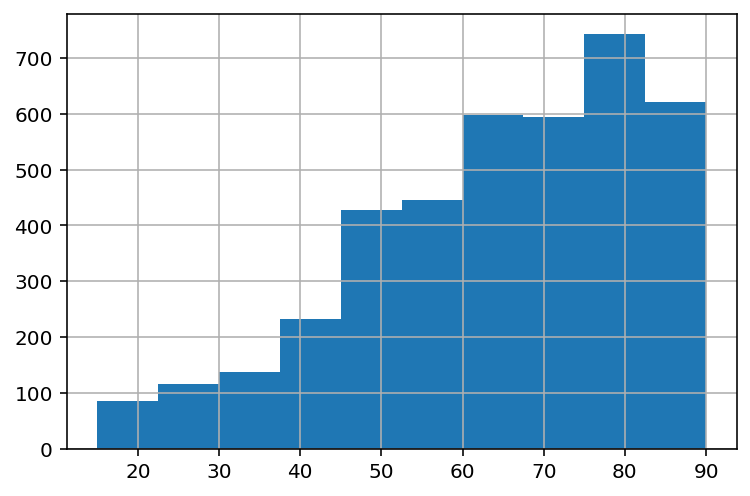

In [102]:
df['Age'].hist()

We can quickly see that the distribution of age is not normal. Let's look at Na

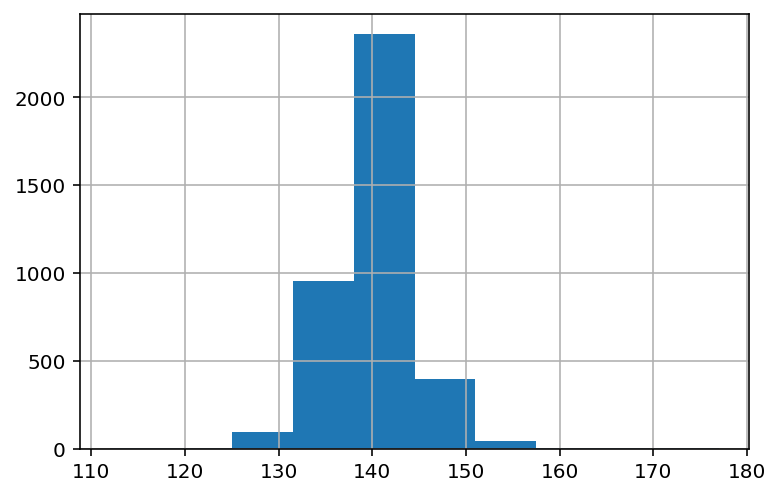

In [103]:
df['Na_max'].hist()

Not a lot of resolution here. Let's increase the number of bins to 30

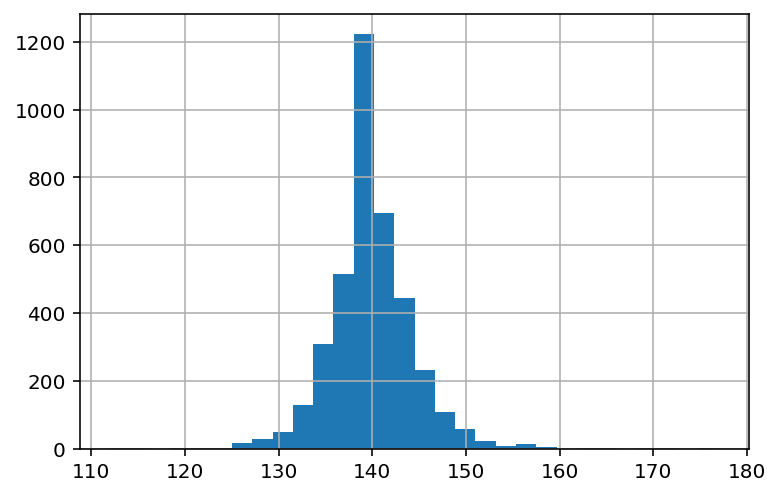

In [104]:
df['Na_max'].hist(bins=30)

Much better! It is easy to see that this is approximately a normal distribution.


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to `Gender` variable and display statistics of three columns in each group:

In [105]:
columns_to_show = ['Na_max', 'K_max', 
                   'HCO3_max']

df.groupby(['Gender'])[columns_to_show].describe(percentiles=[])

Na_max                                      K_max                   \
         count    mean   std    min    50%    max   count  mean   std  min   
Gender                                                                       
Female  1686.0  139.92  4.75  115.0  140.0  177.0  1663.0  4.39  0.92  2.5   
Male    2179.0  139.77  4.37  112.0  140.0  177.0  2127.0  4.44  0.72  2.4   

                  HCO3_max                                 
        50%   max    count   mean   std   min   50%   max  
Gender                                                     
Female  4.3  22.9   1691.0  24.24  4.46   9.0  24.0  47.0  
Male    4.3  10.0   2194.0  24.26  4.00  10.0  24.0  44.0

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [106]:
columns_to_show = ['Na_max', 'K_max', 
                   'HCO3_max']

df.groupby(['Gender'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

Na_max                     K_max                  HCO3_max        \
          mean   std   amin   amax  mean   std amin  amax     mean   std   
Gender                                                                     
Female  139.92  4.75  115.0  177.0  4.39  0.92  2.5  22.9    24.24  4.46   
Male    139.77  4.37  112.0  177.0  4.44  0.72  2.4  10.0    24.26  4.00   

                    
        amin  amax  
Gender              
Female   9.0  47.0  
Male    10.0  44.0


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Gender` and `ICUType`. To do so, we can build a **contingency table** using the `crosstab` method:



In [107]:
pd.crosstab(df['Gender'], df['ICUType'])

ICUType,Cardiac Surgery Recovery Unit,Coronary Care Unit,Medical ICU,Surgical ICU
Gender,,,,
Female,344,244,726,437
Male,530,333,753,630


This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [108]:
df.pivot_table(['TroponinI_max', 'TroponinT_max'],
               ['ICUType'], aggfunc='mean')

,TroponinI_max,TroponinT_max
ICUType,,
Cardiac Surgery Recovery Unit,10.65,1.11
Coronary Care Unit,10.42,3.23
Medical ICU,6.35,0.47
Surgical ICU,8.63,0.31


Nothing surprising here, patients in the coronary/cardiac units have higher values of Troponins.

### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the change in creatinine, let's create the `Delta_creatinine` Series and paste it into the DataFrame:



In [109]:
Delta_creatinine = df['Creatinine_max'] - df['Creatinine_min']

df.insert(loc=len(df.columns), column='Delta_creatinine', value=Delta_creatinine) 
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78,Delta_creatinine
0,132592,35,Female,-1.0,Medical ICU,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,0.0,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN,0.8
1,140662,42,Male,-1.0,Medical ICU,138.1,46.0,46.0,34.0,34.0,19.0,19.0,2.7,2.7,8.0,9.0,0.8,0.8,NaN,NaN,0.7,0.7,NaN,NaN,0.6,1.0,15.0,15.0,235.0,262.0,25.0,27.0,41.1,41.1,115.0,134.0,3.4,3.6,NaN,NaN,NaN,NaN,1.0,1.0,1.8,1.8,48.0,85.0,56.00,95.00,97.0,141.0,134.0,135.0,37.0,45.0,74.0,99.0,151.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4,38.3,NaN,NaN,NaN,NaN,40.0,340.0,18.6,18.6,7.39,7.48,NaN,0.0
2,140104,61,Male,188.0,Cardiac Surgery Recovery Unit,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,0.7,0.8,35.0,69.0,0.4,1.0,3.0,15.0,161.0,161.0,22.0,23.0,24.7,30.5,77.0,111.0,5.1,5.1,NaN,NaN,49.0,91.0,1.0,1.0,2.0,2.0,31.0,56.0,52.33,77.00,88.0,119.0,138.0,138.0,39.0,53.0,115.0,389.0,169.0,255.0,NaN,NaN,97.0,99.0,76.0,122.0,35.6,38.1,NaN,NaN,NaN,NaN,0.0,950.0,10.2,17.1,7.29,7.41,NaN,0.1
3,134685,53,Female,170.2,Surgical ICU,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,0.0,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN,0.0
4,134849,46,Male,-1.0,Medical ICU,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,0.0,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN,0.0


It is possible to add a column more easily without creating an intermediate Series instance:

In [110]:
df['Delta_BUN'] = df['BUN_max'] - df['BUN_min']
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78,Delta_creatinine,Delta_BUN
0,132592,35,Female,-1.0,Medical ICU,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,0.0,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN,0.8,20.0
1,140662,42,Male,-1.0,Medical ICU,138.1,46.0,46.0,34.0,34.0,19.0,19.0,2.7,2.7,8.0,9.0,0.8,0.8,NaN,NaN,0.7,0.7,NaN,NaN,0.6,1.0,15.0,15.0,235.0,262.0,25.0,27.0,41.1,41.1,115.0,134.0,3.4,3.6,NaN,NaN,NaN,NaN,1.0,1.0,1.8,1.8,48.0,85.0,56.00,95.00,97.0,141.0,134.0,135.0,37.0,45.0,74.0,99.0,151.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4,38.3,NaN,NaN,NaN,NaN,40.0,340.0,18.6,18.6,7.39,7.48,NaN,0.0,1.0
2,140104,61,Male,188.0,Cardiac Surgery Recovery Unit,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,0.7,0.8,35.0,69.0,0.4,1.0,3.0,15.0,161.0,161.0,22.0,23.0,24.7,30.5,77.0,111.0,5.1,5.1,NaN,NaN,49.0,91.0,1.0,1.0,2.0,2.0,31.0,56.0,52.33,77.00,88.0,119.0,138.0,138.0,39.0,53.0,115.0,389.0,169.0,255.0,NaN,NaN,97.0,99.0,76.0,122.0,35.6,38.1,NaN,NaN,NaN,NaN,0.0,950.0,10.2,17.1,7.29,7.41,NaN,0.1,0.0
3,134685,53,Female,170.2,Surgical ICU,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,0.0,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN,0.0,0.0
4,134849,46,Male,-1.0,Medical ICU,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,0.0,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN,0.0,0.0


To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [111]:
# get rid of just created columns
df.drop(['Delta_creatinine', 'Delta_BUN'], axis=1, inplace=True) 
# and here’s how you can delete rows
df.drop([1, 2]).head()

,RecordID,Age,Gender,Height,ICUType,Weight,ALP_min,ALP_max,ALT_min,ALT_max,AST_min,AST_max,Albumin_min,Albumin_max,BUN_min,BUN_max,Bilirubin_min,Bilirubin_max,Cholesterol_min,Cholesterol_max,Creatinine_min,Creatinine_max,DiasABP_min,DiasABP_max,FiO2_min,FiO2_max,GCS_min,GCS_max,Glucose_min,Glucose_max,HCO3_min,HCO3_max,HCT_min,HCT_max,HR_min,HR_max,K_min,K_max,Lactate_min,Lactate_max,MAP_min,MAP_max,MechVent_min,MechVent_max,Mg_min,Mg_max,NIDiasABP_min,NIDiasABP_max,NIMAP_min,NIMAP_max,NISysABP_min,NISysABP_max,Na_min,Na_max,PaCO2_min,PaCO2_max,PaO2_min,PaO2_max,Platelets_min,Platelets_max,RespRate_min,RespRate_max,SaO2_min,SaO2_max,SysABP_min,SysABP_max,Temp_min,Temp_max,TroponinI_min,TroponinI_max,TroponinT_min,TroponinT_max,Urine_min,Urine_max,WBC_min,WBC_max,pH_min,pH_max,Unnamed: 78
0,132592,35,Female,-1.0,Medical ICU,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,68.0,NaN,NaN,NaN,NaN,1.5,2.3,NaN,NaN,NaN,NaN,15.0,15.0,110.0,603.0,11.0,17.0,22.8,25.5,90.0,115.0,4.2,5.3,NaN,NaN,NaN,NaN,0.0,NaN,1.9,2.8,43.0,75.0,68.00,93.00,104.0,133.0,140.0,146.0,NaN,NaN,NaN,NaN,287.0,310.0,7.0,26.0,NaN,NaN,NaN,NaN,36.6,37.4,NaN,NaN,0.15,0.59,40.0,130.0,13.9,15.3,NaN,NaN,NaN
3,134685,53,Female,170.2,Surgical ICU,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,12.0,14.0,132.0,132.0,27.0,27.0,36.4,36.4,54.0,97.0,4.3,4.3,2.0,2.0,NaN,NaN,0.0,NaN,2.2,2.2,62.0,76.0,72.00,85.00,107.0,127.0,140.0,140.0,NaN,NaN,NaN,NaN,265.0,265.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,37.2,NaN,NaN,NaN,NaN,39.0,340.0,14.5,14.5,NaN,NaN,NaN
4,134849,46,Male,-1.0,Medical ICU,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,0.9,0.9,NaN,NaN,NaN,NaN,12.0,15.0,148.0,148.0,27.0,27.0,29.1,33.5,79.0,121.0,3.8,3.8,1.4,1.4,NaN,NaN,0.0,NaN,1.7,1.7,47.0,79.0,64.00,99.33,95.0,140.0,138.0,138.0,NaN,NaN,NaN,NaN,181.0,224.0,16.0,29.0,NaN,NaN,NaN,NaN,36.2,37.7,NaN,NaN,NaN,NaN,10.0,200.0,4.7,10.9,NaN,NaN,NaN
5,136938,77,Male,-1.0,Surgical ICU,111.0,95.0,95.0,13.0,13.0,19.0,19.0,3.7,3.7,30.0,35.0,0.4,0.4,119.0,119.0,7.3,8.3,27.0,76.0,0.4,1.0,6.0,9.0,153.0,161.0,26.0,29.0,34.1,35.5,64.0,82.0,4.0,4.5,1.6,2.8,52.0,124.0,1.0,1.0,2.0,2.1,36.0,96.0,55.67,124.70,95.0,208.0,137.0,139.0,37.0,48.0,123.0,397.0,228.0,235.0,NaN,NaN,NaN,NaN,91.0,215.0,35.8,36.7,NaN,NaN,0.13,0.15,NaN,NaN,7.5,10.8,7.40,7.48,NaN
6,138915,60,Male,175.3,Coronary Care Unit,85.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,NaN,0.9,0.9,58.0,79.0,NaN,NaN,15.0,15.0,134.0,134.0,27.0,27.0,29.7,31.5,65.0,88.0,3.6,4.0,NaN,NaN,72.0,95.0,0.0,NaN,1.6,1.6,NaN,NaN,NaN,NaN,NaN,NaN,139.0,139.0,41.0,57.0,149.0,237.0,222.0,222.0,NaN,NaN,NaN,NaN,86.0,111.0,36.8,36.9,NaN,NaN,NaN,NaN,0.0,900.0,9.0,9.0,7.32,7.42,NaN


## 2. Exploring some associations


Let's see how mechanical ventilation is related to Gender. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn`.


In [112]:
pd.crosstab(df['MechVent_min'], df['Gender'], margins=True)

Gender,Female,Male,All
MechVent_min,,,
0.0,722,862,1584
1.0,1029,1384,2413
All,1751,2246,3997


In [113]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

Now we create the plot that will show us the counts of mechanically ventilated patients by gender.

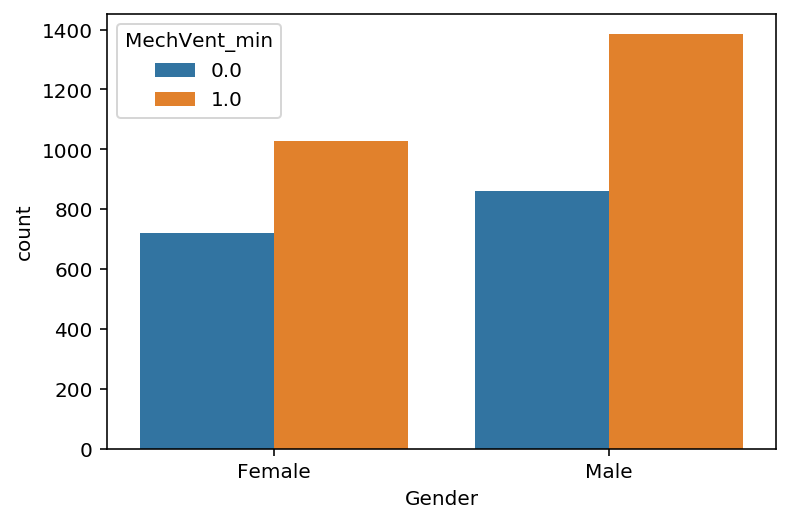

In [120]:
sns.countplot(x='Gender', hue='MechVent_min', data=df);

We see that th number (and probably the proportion) of mechanically ventilated patients is greater among males. 

Next, let's look at the same distribution but comparing the different ICU types: Let's also make a summary table and a picture.

In [123]:
pd.crosstab(df['ICUType'], df['MechVent_min'], margins=True)

MechVent_min,0.0,1.0,All
ICUType,,,
Cardiac Surgery Recovery Unit,91,783,874
Coronary Care Unit,347,230,577
Medical ICU,767,714,1481
Surgical ICU,381,687,1068
All,1586,2414,4000


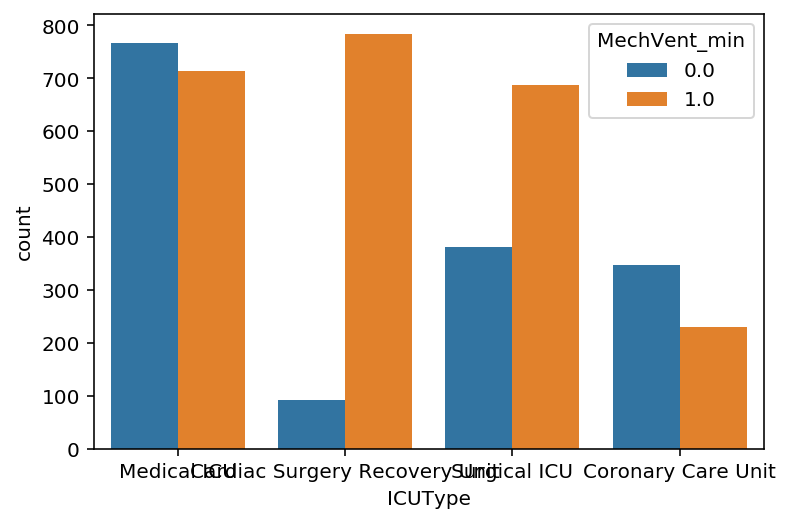

In [124]:
sns.countplot(x='ICUType', hue='MechVent_min', data=df);

As you can see, the proportion of patients ventilated and not ventilated is very different across the different types of ICUs. That is particularly true in the cardiac surgery recovery unit. Can you think of a reason why that might be?

## 3. Some useful resources

* ["Merging DataFrames with pandas"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - a tutorial by Max Plako within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
* ["Handle different dataset with dask and trying a little dask ML"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/dask_objects_and_little_dask_ml_tutorial_iknyazeva.ipynb) - a tutorial by Irina Knyazeva within mlcourse.ai
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
* Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68) based on this notebook
* If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/322626/) on Habr.com with ~ the same material. And a [lecture](https://youtu.be/dEFxoyJhm3Y) on YouTube
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn